In [31]:
import numpy as np

from matplotlib import pyplot as plt
from citk.layer import Dense
from citk.model import FFN
from citk.functions import ReLU, Linear
from citk.losses import MSE
from citk.optimisers import GeneticAlgorithmOptimizer

from utils import get_and_process_boston_dataset, visualise_boston, seed_everything,get_and_process_load_diabetes

%matplotlib inline

import numpy

# Data

In [12]:
RANDOM_SEED = 42

seed_everything(RANDOM_SEED)

test_size = 0.5

X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []
for i in range(10):


    X_train, X_test, y_train, y_test = get_and_process_load_diabetes(random_state=RANDOM_SEED, test_size=test_size)

    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
    
    print(f"test_size = {test_size}")
    print(f"X_train shape = {X_train.shape}")
    print(f"X_test shape = {X_test.shape}")

    
    
    #visualise_boston(X_train, X_test, y_train, y_test)

    test_size = test_size - 0.04

test_size = 0.5
X_train shape = (221, 10)
X_test shape = (221, 10)
test_size = 0.46
X_train shape = (238, 10)
X_test shape = (204, 10)
test_size = 0.42000000000000004
X_train shape = (256, 10)
X_test shape = (186, 10)
test_size = 0.38000000000000006
X_train shape = (274, 10)
X_test shape = (168, 10)
test_size = 0.3400000000000001
X_train shape = (291, 10)
X_test shape = (151, 10)
test_size = 0.3000000000000001
X_train shape = (309, 10)
X_test shape = (133, 10)
test_size = 0.2600000000000001
X_train shape = (327, 10)
X_test shape = (115, 10)
test_size = 0.2200000000000001
X_train shape = (344, 10)
X_test shape = (98, 10)
test_size = 0.1800000000000001
X_train shape = (362, 10)
X_test shape = (80, 10)
test_size = 0.1400000000000001
X_train shape = (380, 10)
X_test shape = (62, 10)


/Users/pavloboiko/.local/share/virtualenvs/python_notebook-Zis-PRDe/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2588: UserWarning: n_quantiles (300) is greater than the total number of samples (221). n_quantiles is set to n_samples.
  warnings.warn(
/Users/pavloboiko/.local/share/virtualenvs/python_notebook-Zis-PRDe/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2588: UserWarning: n_quantiles (300) is greater than the total number of samples (238). n_quantiles is set to n_samples.
  warnings.warn(
/Users/pavloboiko/.local/share/virtualenvs/python_notebook-Zis-PRDe/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2588: UserWarning: n_quantiles (300) is greater than the total number of samples (256). n_quantiles is set to n_samples.
  warnings.warn(
/Users/pavloboiko/.local/share/virtualenvs/python_notebook-Zis-PRDe/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2588: UserWarning: n_quantiles (300) is greater than the total number of sampl

In [13]:
#перевірка листа
for element in X_train_list:
    print(f"X_train shape = {element.shape}")

X_train shape = (221, 10)
X_train shape = (238, 10)
X_train shape = (256, 10)
X_train shape = (274, 10)
X_train shape = (291, 10)
X_train shape = (309, 10)
X_train shape = (327, 10)
X_train shape = (344, 10)
X_train shape = (362, 10)
X_train shape = (380, 10)


# Create Model

In [3]:
model = FFN(
    input_shape=X_train.shape[1], 
    layer_specs=[
        Dense(16, nonlinearity=ReLU),
        Dense(32, nonlinearity=ReLU),
        Dense(1, nonlinearity=Linear)
    ], 
    loss=MSE, 
    reg_coef=0.01
)

## Train Model

In [4]:
trained, history = model.fit(
    train_sample=(X_train, y_train),
    validation_sample=(X_test, y_test),
    optimiser=GeneticAlgorithmOptimizer(100),
    batch_size=32,
    epochs=1_000,
    verbose=False
)

# Predict and Visualise losses

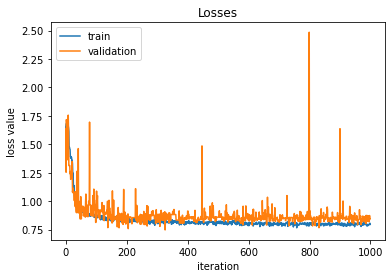

In [5]:
plt.title('Losses')
plt.plot(history['train_loss'], label='train')
plt.plot(history['validation_loss'], label='validation')
plt.xlabel('iteration')
plt.ylabel('loss value')
plt.legend()
plt.show()

In [6]:
prediction = trained.predict(X_test)
prediction_train = trained.predict(X_train)

print(f"Test MSE: {MSE(y_test, prediction)[0]}")
print(f"Train MSE: {MSE(y_train, prediction_train)[0]}")

Test MSE: 0.7465208056935279
Train MSE: 0.5081047133643461


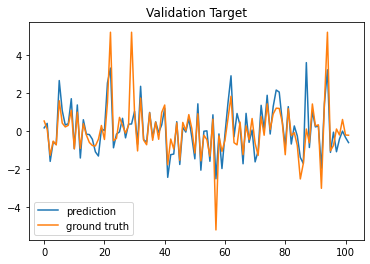

In [7]:
plt.title('Validation Target')
plt.plot(prediction, label='prediction')
plt.plot(y_test, label='ground truth')
plt.legend()
plt.show()

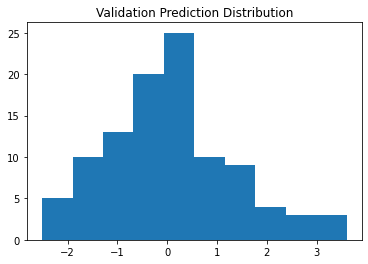

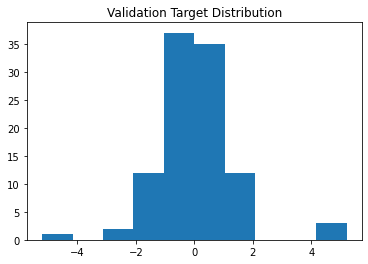

In [8]:
plt.title('Validation Prediction Distribution')
plt.hist(prediction)
plt.show()

plt.title('Validation Target Distribution')
plt.hist(y_test)
model = FFN(
    input_shape=X_train.shape[1], 
    layer_specs=[
        Dense(16, nonlinearity=ReLU),
        Dense(32, nonlinearity=ReLU),
        Dense(1, nonlinearity=Linear)
    ], 
    loss=MSE, 
    reg_coef=0.01
)plt.show()

####################
X_train shape = (221, 10)


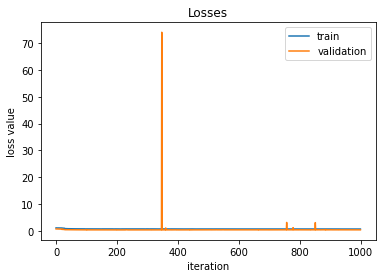

Test MSE: 0.44423683588074725
Train MSE: 0.6132282663085784


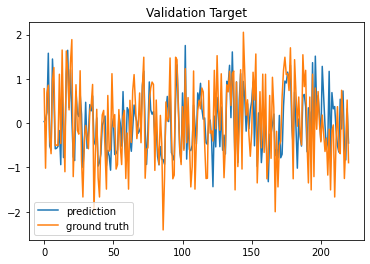

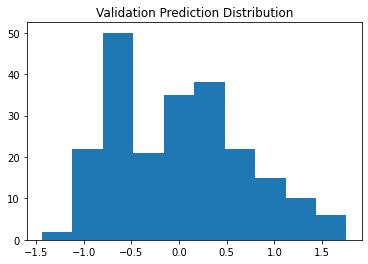

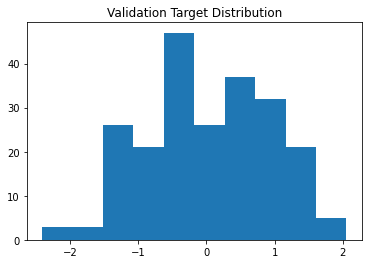

####################
X_train shape = (238, 10)


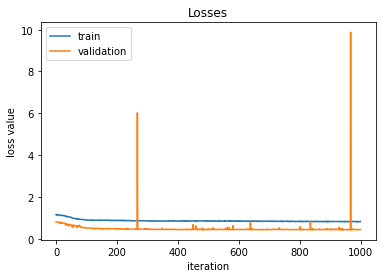

Test MSE: 0.4194594316318602
Train MSE: 0.6673679455324297


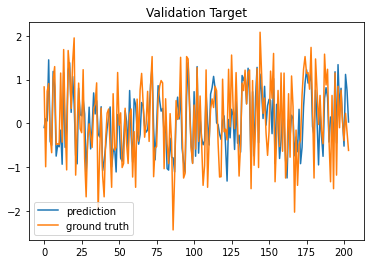

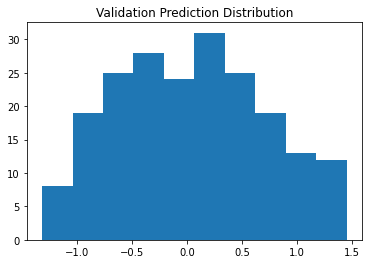

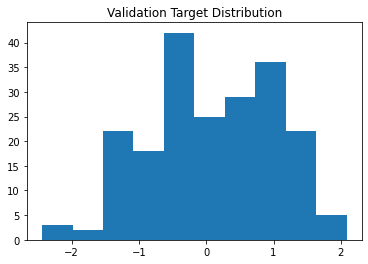

####################
X_train shape = (256, 10)


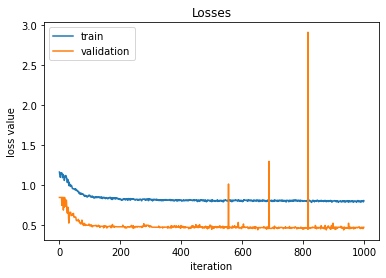

Test MSE: 0.43961571399755855
Train MSE: 0.6586385846905944


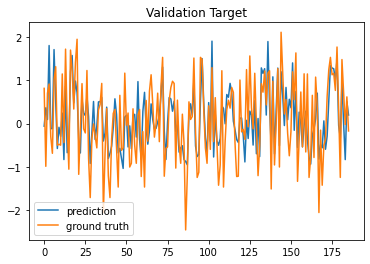

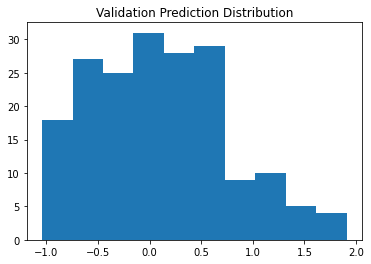

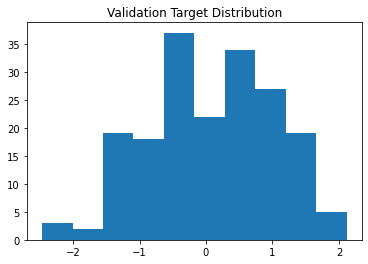

####################
X_train shape = (274, 10)


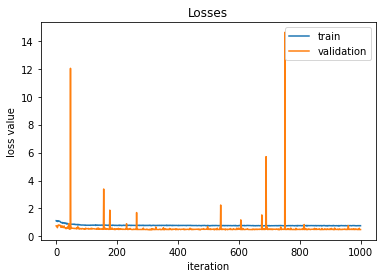

Test MSE: 0.46729474348983907
Train MSE: 0.6638127036576944


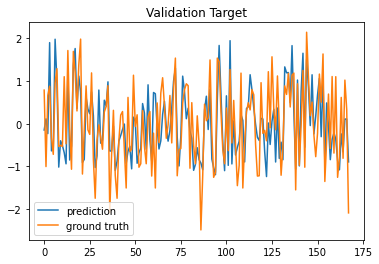

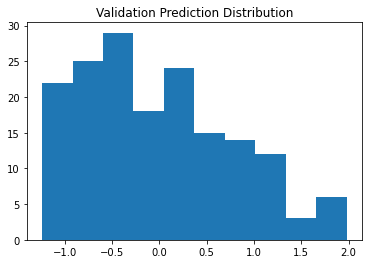

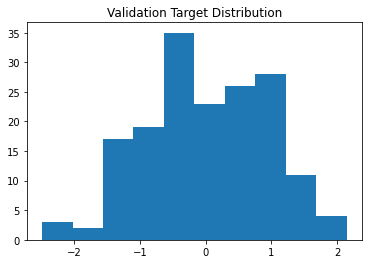

####################
X_train shape = (291, 10)


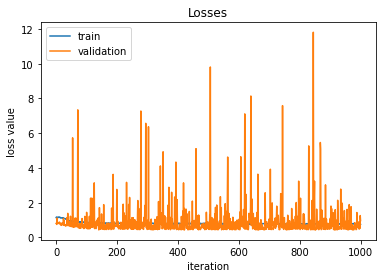

Test MSE: 0.4355969375724332
Train MSE: 0.6443364696928414


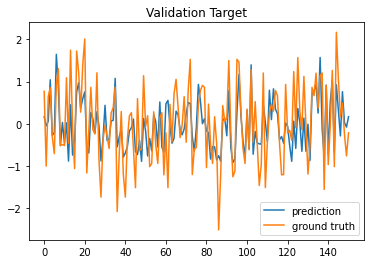

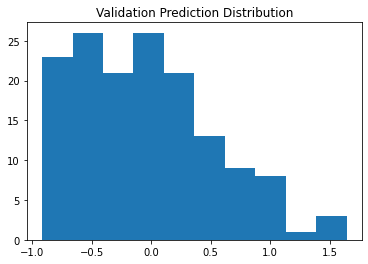

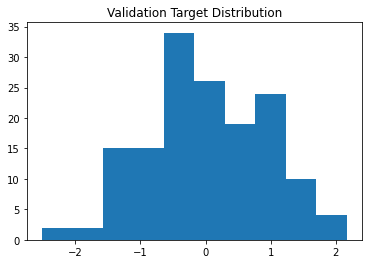

####################
X_train shape = (309, 10)


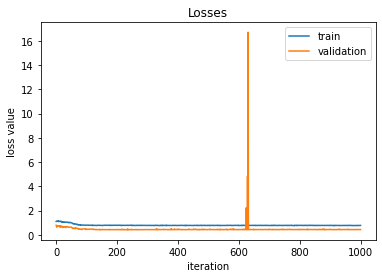

Test MSE: 0.40551786938953727
Train MSE: 0.6025449037955493


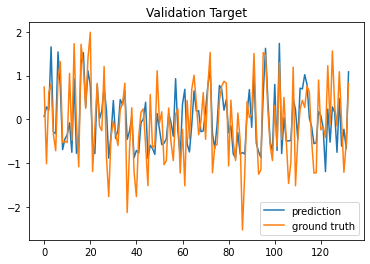

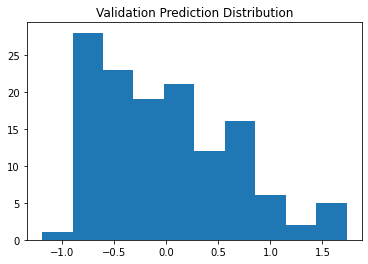

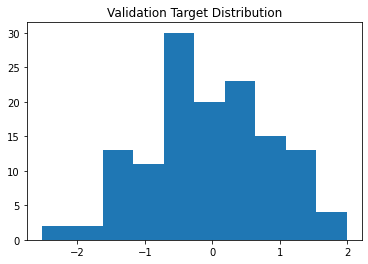

####################
X_train shape = (327, 10)


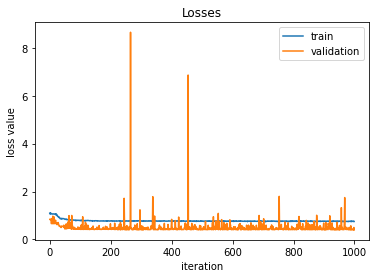

Test MSE: 0.3985342830846279
Train MSE: 0.6231310446315381


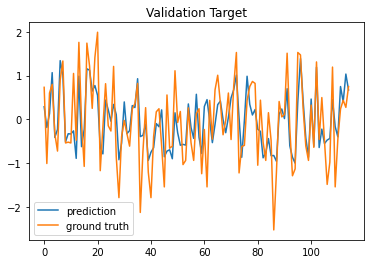

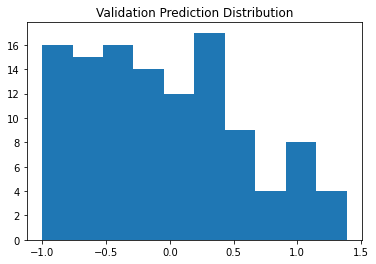

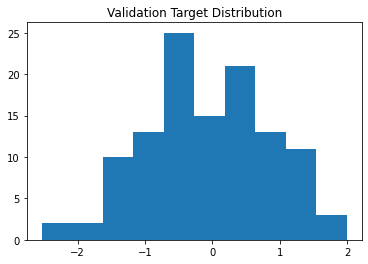

####################
X_train shape = (344, 10)


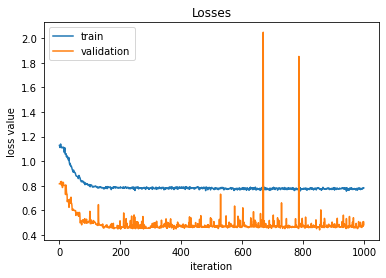

Test MSE: 0.4417357761437296
Train MSE: 0.6247233039604952


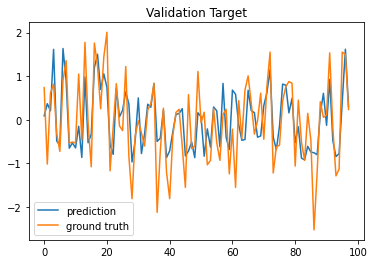

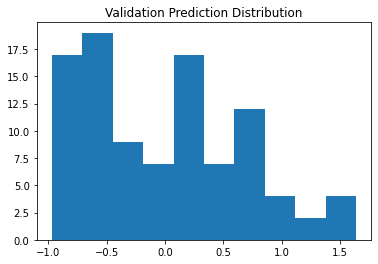

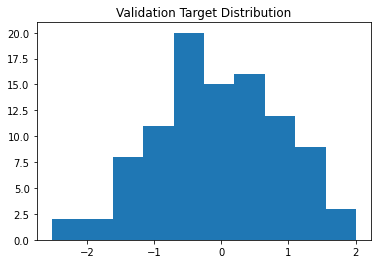

####################
X_train shape = (362, 10)


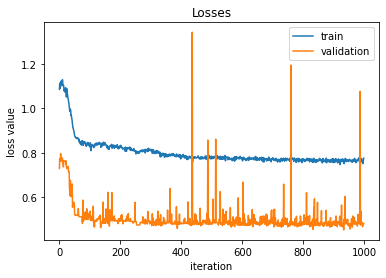

Test MSE: 0.45368870238730474
Train MSE: 0.6150581507621538


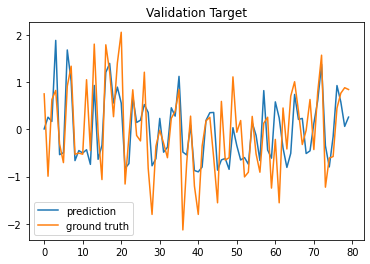

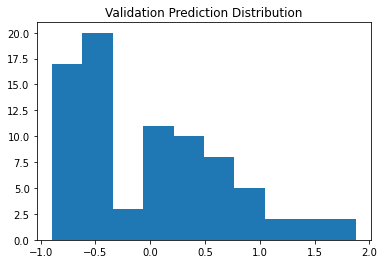

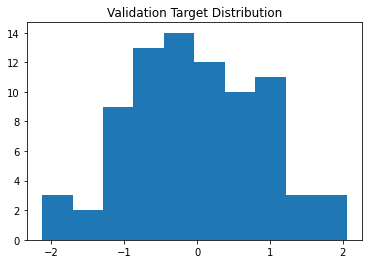

####################
X_train shape = (380, 10)


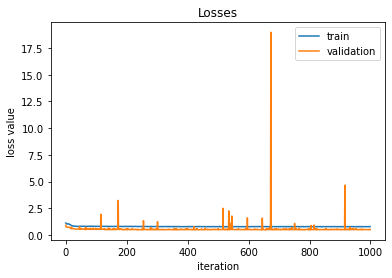

Test MSE: 0.4699749982956212
Train MSE: 0.5922920328035358


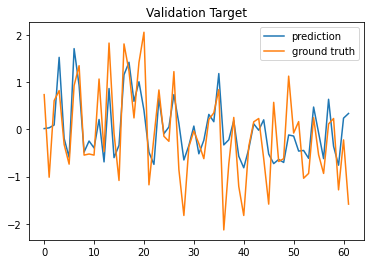

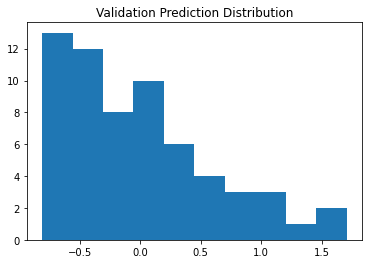

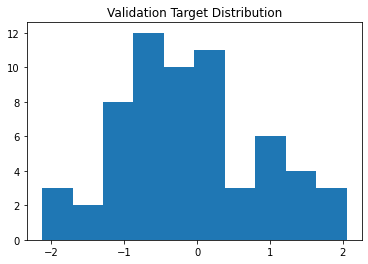

In [38]:
Test_MSE_list = []
Train_MSE_list = []
list_weigh = []

for i in range(10):
    print("####################")
    
    

    print(f"X_train shape = {X_train_list[i].shape}")
    
    X_train = X_train_list[i]
    y_train = y_train_list[i]
    y_test = y_test_list[i]
    X_test = X_test_list[i]
    model = FFN(
        input_shape=X_train.shape[1], 
        layer_specs=[
            Dense(16, nonlinearity=ReLU),
            Dense(32, nonlinearity=ReLU),
            Dense(1, nonlinearity=Linear)
        ], 
        loss=MSE, 
        reg_coef=0.01
    )

    trained, history = model.fit(
        train_sample=(X_train, y_train),
        validation_sample=(X_test, y_test),
        optimiser=GeneticAlgorithmOptimizer(100),
        batch_size=32,
        epochs=1_000,
        verbose=False
    )
    
    list_weigh.append(model.W_vect)
    
                  
    plt.title('Losses')
    plt.plot(history['train_loss'], label='train')
    plt.plot(history['validation_loss'], label='validation')
    plt.xlabel('iteration')
    plt.ylabel('loss value')
    plt.legend()
    plt.savefig(f'test_{i}_Losses.png')
    plt.show()
    
    prediction = trained.predict(X_test)
    prediction_train = trained.predict(X_train)
                  
    with open(f'test_{i}_weigh.npy', 'wb') as f1, open(f'test_{i}_MSE.npy', 'wb') as f:
        np.save(f1, np.array(model.W_vect))
        np.save(f, np.array([MSE(y_test, prediction)[0], MSE(y_train, prediction_train)[0]]))

    print(f"Test MSE: {MSE(y_test, prediction)[0]}")
    print(f"Train MSE: {MSE(y_train, prediction_train)[0]}")
    
    Test_MSE_list.append(MSE(y_test, prediction)[0])
    Train_MSE_list.append(MSE(y_train, prediction_train)[0])
    
    
    plt.title('Validation Target')
    plt.plot(prediction, label='prediction')
    plt.plot(y_test, label='ground truth')
    plt.legend()
    plt.savefig(f'test_{i}_Validation Target.png')
    plt.show()

    plt.title('Validation Prediction Distribution')
    plt.hist(prediction)
    plt.savefig(f'test_{i}_Validation Prediction Distribution.png')
    plt.show()

    plt.title('Validation Target Distribution')
    plt.hist(y_test)
    model = FFN(
        input_shape=X_train.shape[1], 
        layer_specs=[
            Dense(16, nonlinearity=ReLU),
            Dense(32, nonlinearity=ReLU),
            Dense(1, nonlinearity=Linear)
        ], 
        loss=MSE, 
        reg_coef=0.01)
    plt.savefig(f'test_{i}_Validation Target Distribution.png')
    plt.show()

In [21]:
model = FFN(
        input_shape=X_train_list[8].shape[1], 
        layer_specs=[
            Dense(16, nonlinearity=ReLU),
            Dense(32, nonlinearity=ReLU),
            Dense(1, nonlinearity=Linear)
        ], 
        loss=MSE, 
        reg_coef=0.01
    )

trained, history = model.fit(
        train_sample=(X_train_list[8], y_train_list[8]),
        validation_sample=(X_test_list[8], y_test_list[8]),
        optimiser=GeneticAlgorithmOptimizer(100),
        batch_size=32,
        epochs=1_0,
        verbose=False
    )

In [33]:
prediction = trained.predict(X_test)
prediction_train = trained.predict(X_train)

In [35]:
with open(f'test_120_weigh.npy', 'wb') as f1, open(f'test_120_MSE.npy', 'wb') as f:
    np.save(f1, np.array(model.W_vect))
    np.save(f, np.array([MSE(y_test, prediction)[0], MSE(y_train, prediction_train)[0]]))

In [29]:
list_1 =[]

list_1.append(model.W_vect)

In [30]:
list_1[0]

(753,)

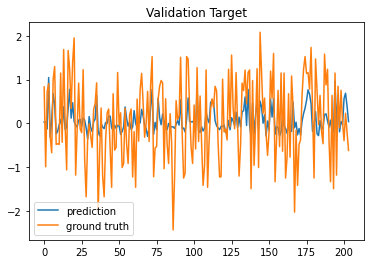

In [37]:
plt.title('Validation Target')
plt.plot(prediction, label='prediction')
plt.plot(y_test, label='ground truth')
plt.legend()
plt.savefig(f'test_23_Validation Target Distribution.png')
plt.show()

In [39]:
import pandas as pd

In [40]:
pd_list_weigh = pd.DataFrame(list_weigh)

In [41]:
pd_Train_MSE_list = pd.DataFrame(Train_MSE_list)
pd_Test_MSE_list = pd.DataFrame(Test_MSE_list)

In [47]:
pd_Train_MSE_list.columns = ['Train_MSE']

In [49]:
pd_Train_MSE_list['Test_MSE'] = pd_Test_MSE_list[0]

In [51]:
pd_Train_MSE_list.to_csv('MSE.csv')

In [52]:
pd_Train_MSE_list

,Train_MSE,Test_MSE
0,0.613228,0.444237
1,0.667368,0.419459
2,0.658639,0.439616
3,0.663813,0.467295
4,0.644336,0.435597
5,0.602545,0.405518
6,0.623131,0.398534
7,0.624723,0.441736
8,0.615058,0.453689
9,0.592292,0.469975


In [42]:
pd_list_weigh

,0,1,2,3,4,5,6,7,8,9,...,743,744,745,746,747,748,749,750,751,752
0,0.054505,-0.057887,0.075752,-0.182866,0.290746,0.130844,0.031040,0.617557,-0.037141,0.080324,...,-0.277468,0.098171,0.234984,-0.242156,0.174518,-0.182614,-0.310359,0.533689,0.046687,-0.175952
1,0.019055,-0.063078,-0.038869,0.024731,-0.165204,0.201122,-0.110419,0.206694,0.032851,0.130788,...,0.011218,0.007091,-0.004698,0.157799,0.178834,-0.162528,0.350377,-0.106025,-0.066435,0.088613
2,-0.268506,0.138492,-0.314520,-0.119317,0.188333,0.208897,-0.130090,-0.063039,-0.039636,0.172472,...,0.390765,-0.197358,0.139186,0.072474,-0.067872,0.204721,-0.089252,0.076979,-0.007645,-0.255161
3,0.000540,-0.063628,0.111888,0.096745,-0.161488,-0.081197,0.030592,0.172859,-0.218628,0.161630,...,0.052888,-0.267991,0.423419,-0.059718,0.007932,0.077511,-0.044536,-0.155826,-0.375115,0.002711
4,-0.225694,0.029909,0.087569,0.206352,-0.139300,-0.326223,-0.103374,0.183704,0.127082,0.074215,...,0.033264,0.073372,0.260948,-0.012763,-0.147814,-0.030192,-0.042919,0.191246,-0.013092,-0.218036
5,0.063630,0.063517,0.209273,-0.033136,0.035436,-0.148880,-0.001570,-0.063793,0.050645,-0.013283,...,-0.043858,-0.206575,0.060475,-0.151546,-0.049178,0.110734,-0.000830,-0.020484,0.062704,-0.046279
6,0.006836,0.130107,0.037587,-0.203064,-0.409379,0.019388,0.100862,-0.187189,-0.089178,-0.166337,...,0.097256,-0.134055,-0.026259,-0.080346,-0.495774,0.342890,0.094995,0.361924,0.510575,-0.272670
7,-0.168698,-0.154044,-0.247715,0.136509,-0.189142,0.332972,0.085513,-0.062746,0.127934,0.151085,...,0.427706,-0.294001,0.098750,0.098353,0.100737,0.133657,-0.081982,0.176751,-0.017662,-0.028432
8,0.028399,0.260909,0.425985,0.035307,0.012443,-0.040983,-0.087790,-0.041458,-0.019414,0.189774,...,0.233339,0.259722,-0.084101,-0.102655,0.375787,-0.277050,0.039542,-0.289506,0.441052,-0.249375
9,-0.004853,-0.210904,0.071986,-0.018761,-0.005728,-0.189198,0.122025,-0.006292,-0.101300,-0.074583,...,0.029749,-0.535551,0.348127,0.216721,0.187523,0.220301,0.064298,0.016355,0.026521,-0.264016


In [43]:
pd_list_weigh.to_csv('list_weigh.csv')